# 🪔 Diwali Sales Analysis

### 📘 About Dataset
The dataset contains Diwali sales records including customer demographics, purchase amounts, and product categories.  
Goal: To analyze customer purchasing behavior and identify key sales trends.


### Step 1: Import Libraries

In [36]:
# import python libraries

import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

### Step 2: Load and Explore Data

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Step 3: Data Cleaning

In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [12]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Step 4: Exploratory Data Analysis (EDA)

### Gender

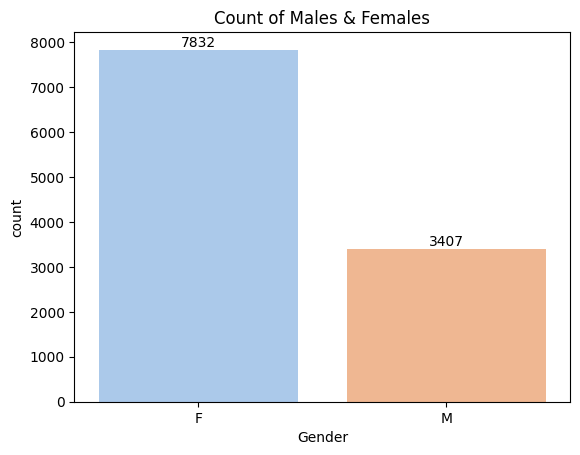

In [15]:
# plotting a bar chart for Gender and it's count
sns.set_palette('pastel') # Sets the 'pastel' palette as default
ax = sns.countplot(x = 'Gender',data = df, hue='Gender')
plt.title("Count of Males & Females")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Total Purchase Amount (₹)')

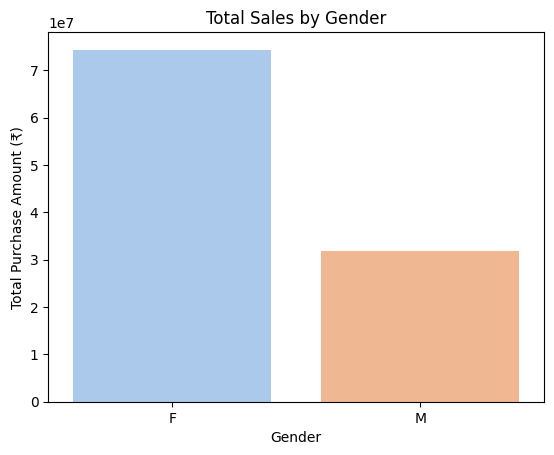

In [16]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, hue='Gender')
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount (₹)")

**Insight:** *From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

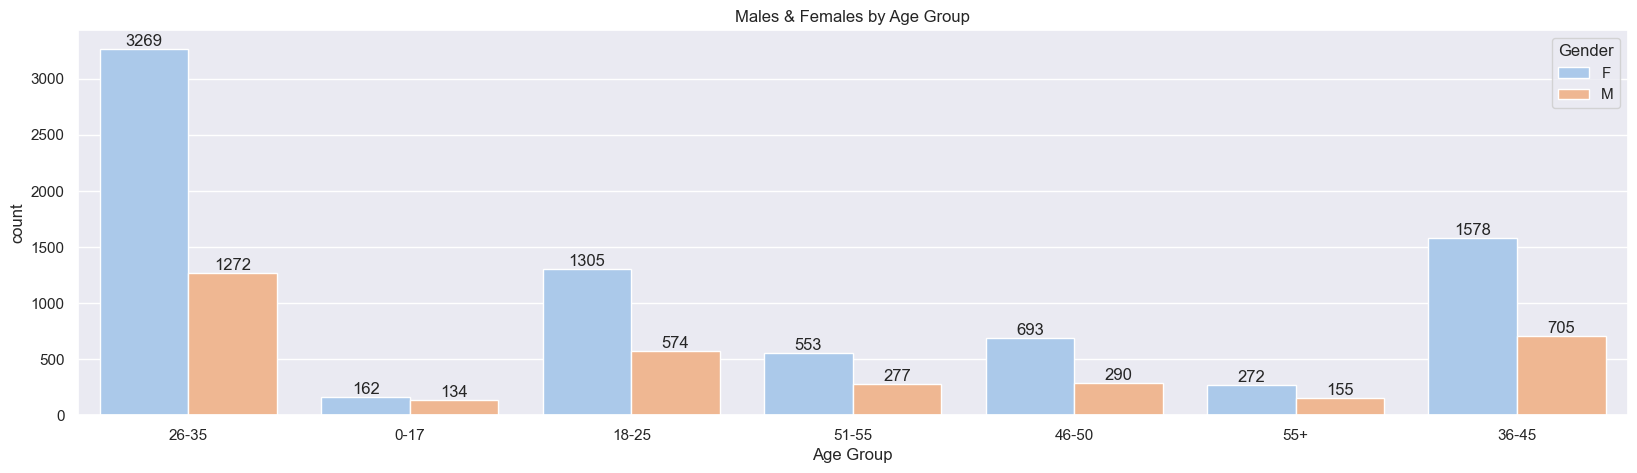

In [34]:
sns.set_palette('pastel') # Sets the 'pastel' palette as default
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title("Males & Females by Age Group")
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.savefig('images/Males & Females by Age Group.png',dpi=300,bbox_inches='tight')

Text(0, 0.5, 'Total Purchase Amount (₹)')

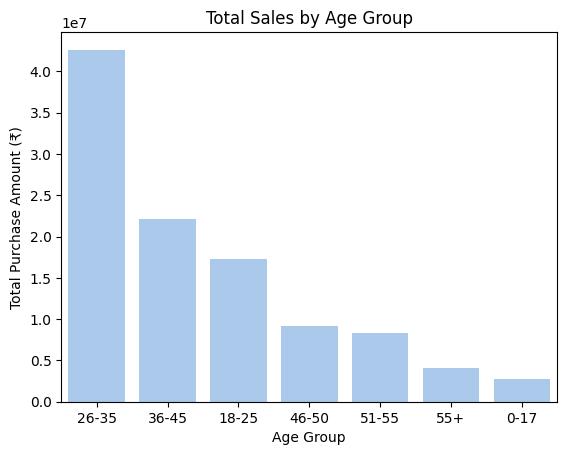

In [19]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.title("Total Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Purchase Amount (₹)")

**Insight:** *From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: title={'center': 'Top 10 States By Orders'}, xlabel='State', ylabel='Orders'>

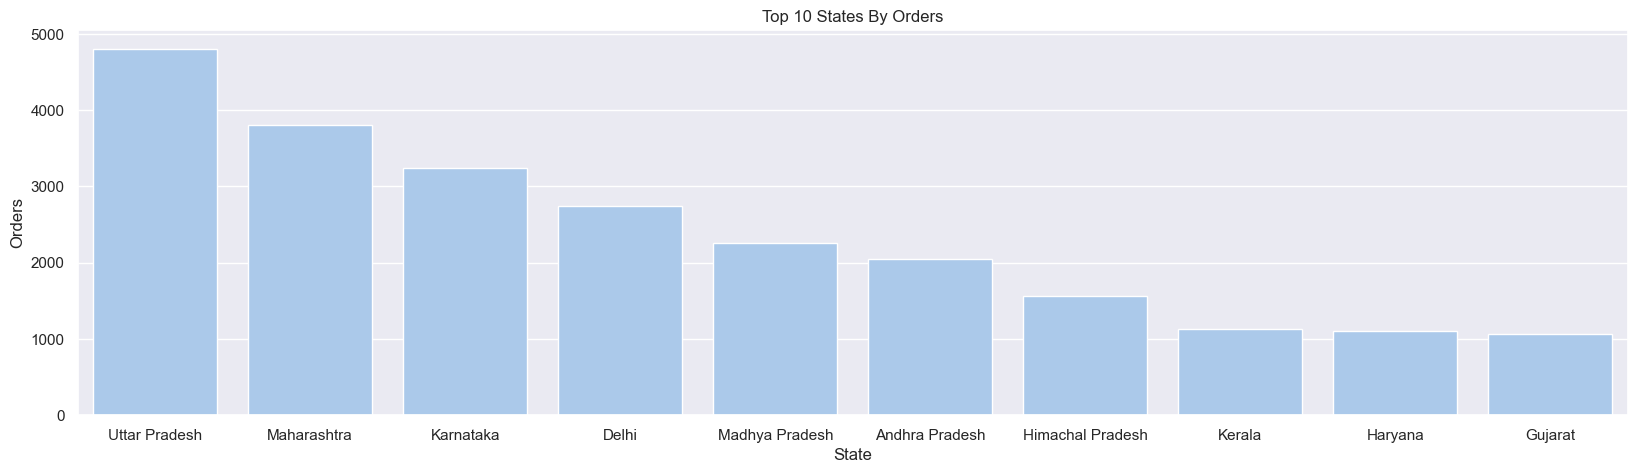

In [35]:
# total number of orders from top 10 states
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.title("Top 10 States By Orders")
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

Text(0, 0.5, 'State')

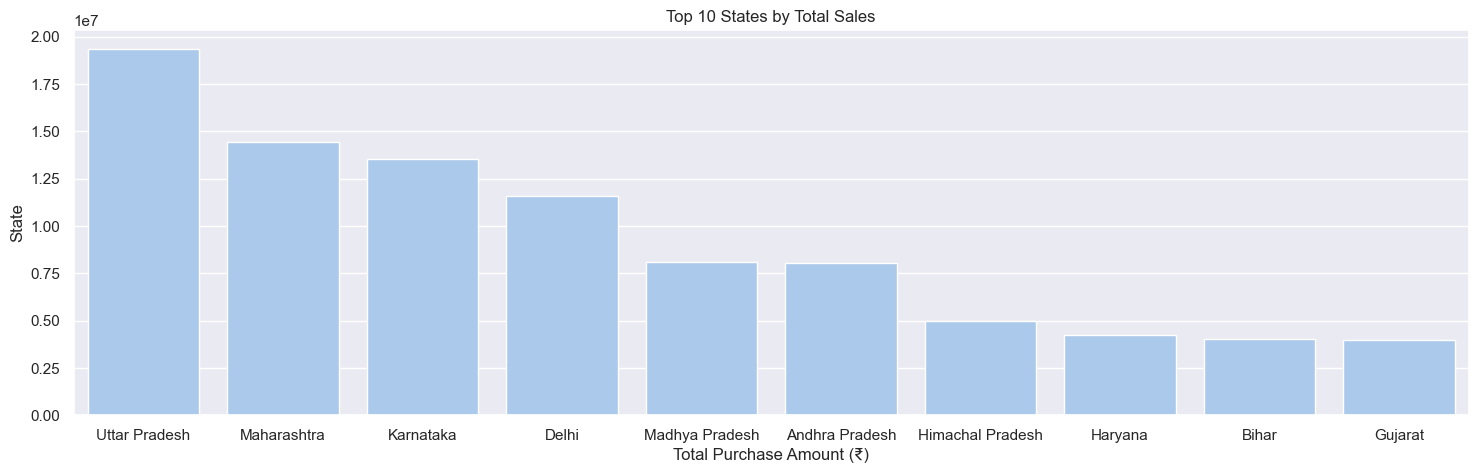

In [24]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Total Purchase Amount (₹)")
plt.ylabel("State")

**Insight:** *From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

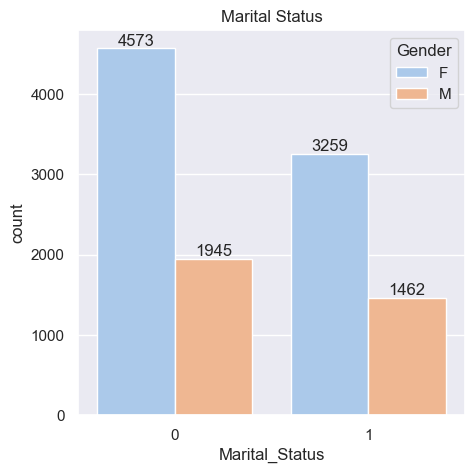

In [26]:
sns.set_palette('pastel') # Sets the 'pastel' palette as default
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Gender')
plt.title("Marital Status")
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

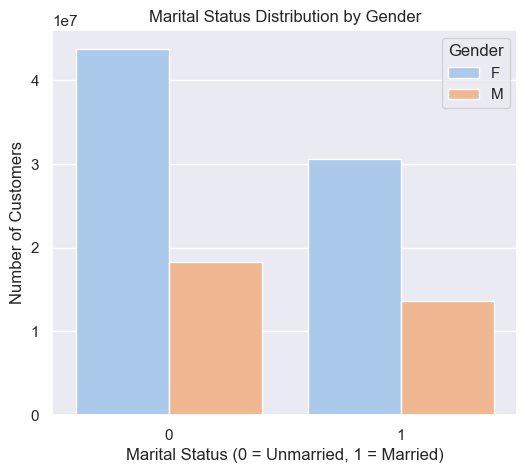

In [28]:

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.title("Marital Status Distribution by Gender")
plt.xlabel("Marital Status (0 = Unmarried, 1 = Married)")
plt.ylabel("Number of Customers")

plt.savefig('images/Marital Status Distribution by Gender.png',dpi=300,bbox_inches='tight')

**Insight:** *From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

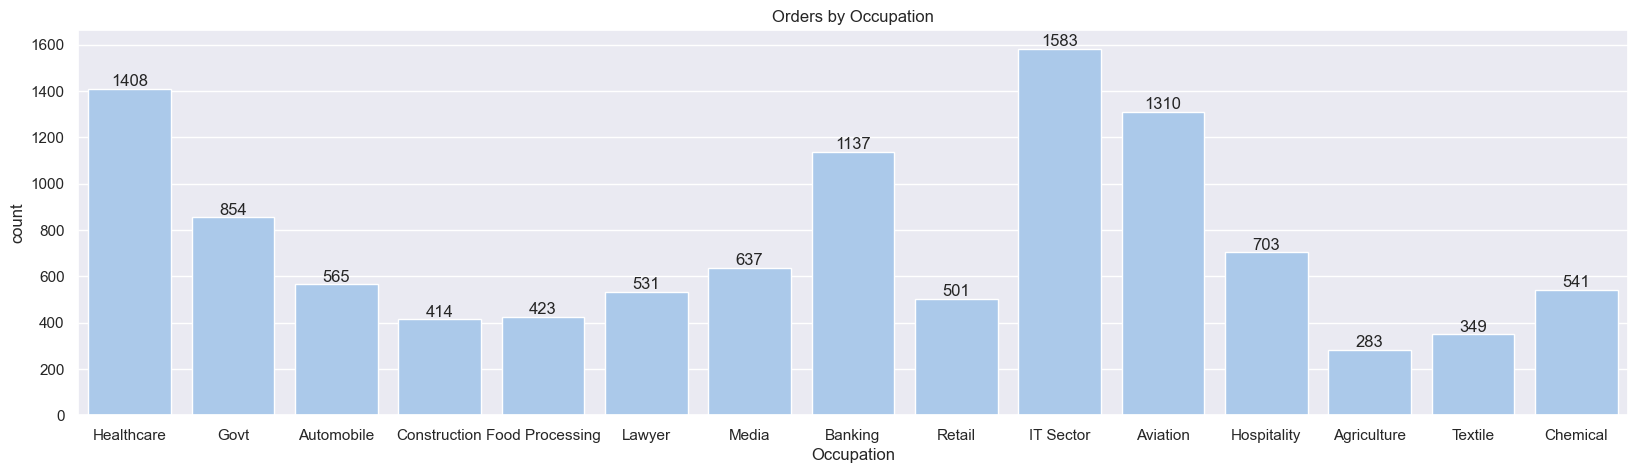

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
ax = sns.countplot(data = df, x = 'Occupation')
plt.title("Orders by Occupation")
for bars in ax.containers:
    ax.bar_label(bars)

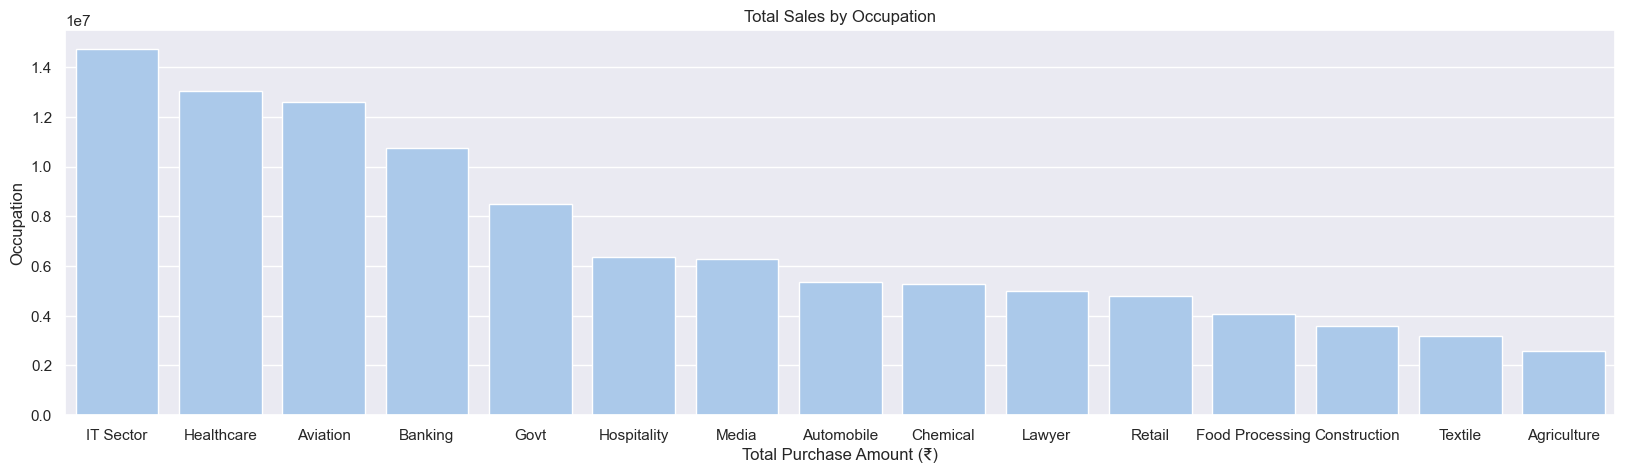

In [30]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.title("Total Sales by Occupation")
plt.xlabel("Total Purchase Amount (₹)")
plt.ylabel("Occupation")

plt.savefig('images/Total Sales by Occupation.png',dpi=300,bbox_inches='tight')

**Insight:** *From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

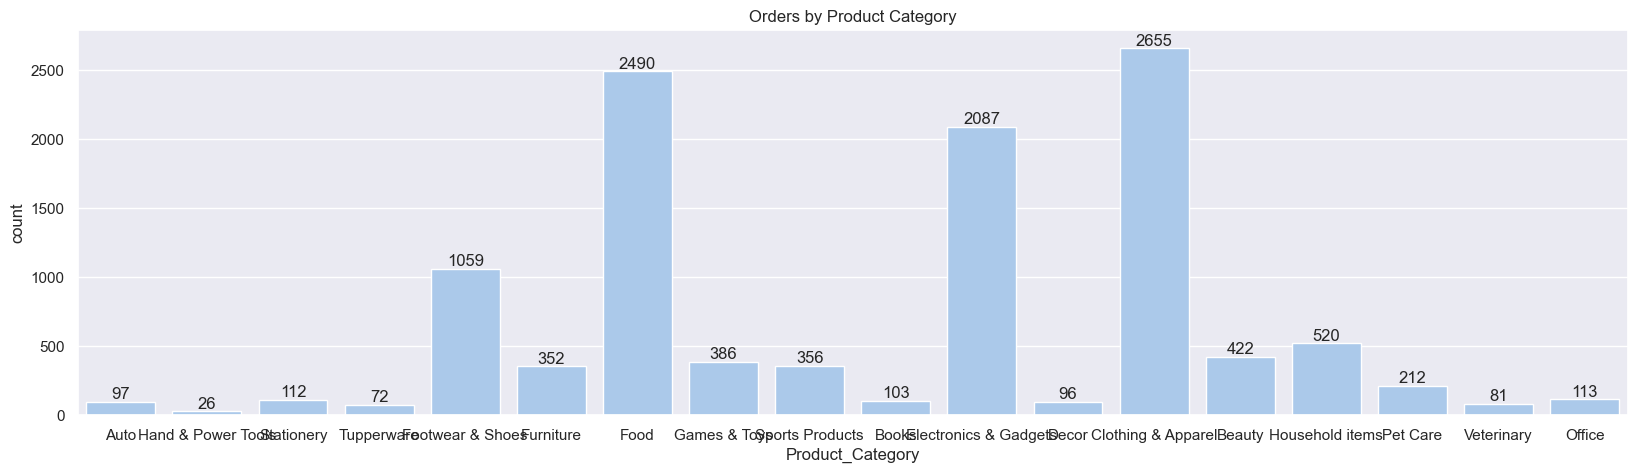

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
ax = sns.countplot(data = df, x = 'Product_Category')
plt.title("Orders by Product Category")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Product Category')

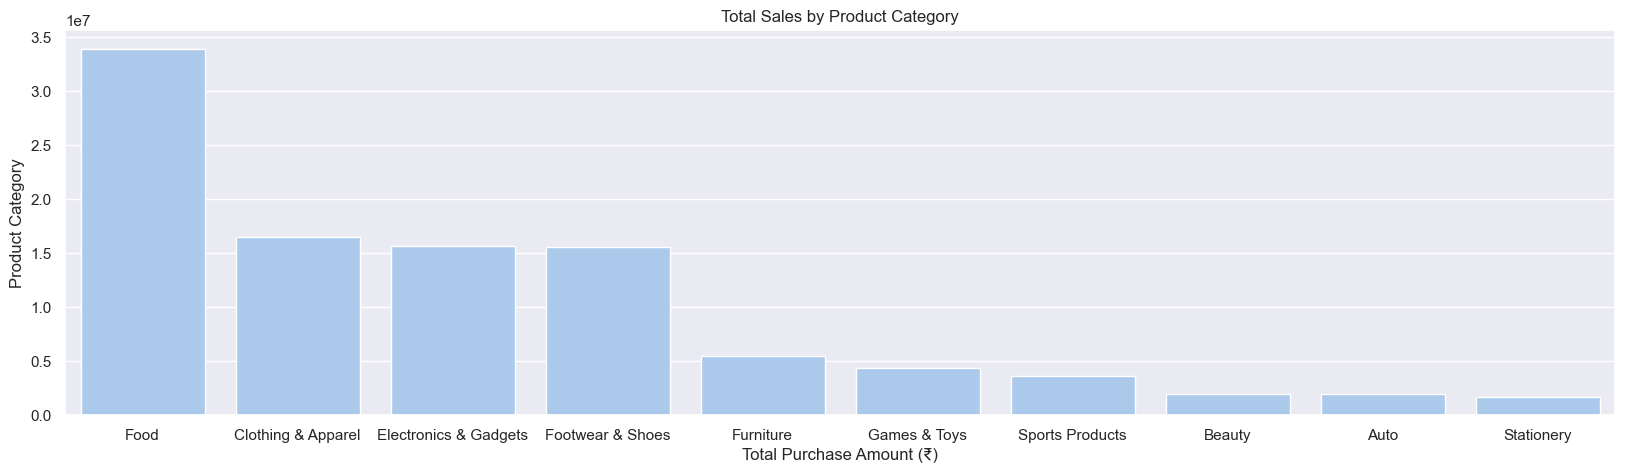

In [32]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.set_palette('pastel') # Sets the 'pastel' palette as default
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.title("Total Sales by Product Category")
plt.xlabel("Total Purchase Amount (₹)")
plt.ylabel("Product Category")

**Insight:** *From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: title={'center': 'Top 10 Product by Orders'}, xlabel='Product_ID'>

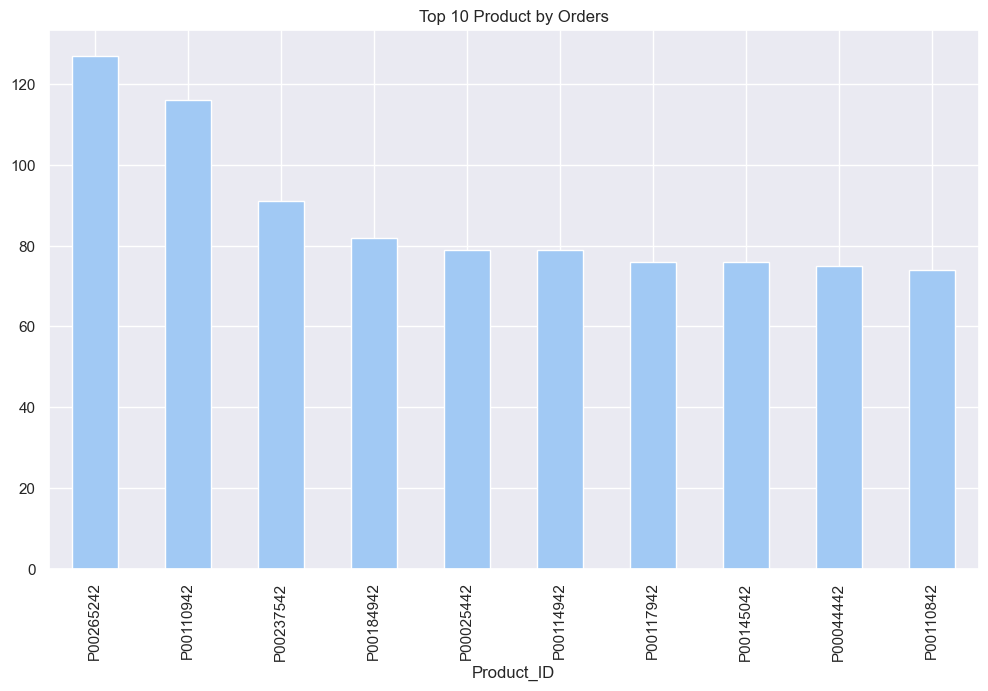

In [33]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
sns.set_palette('pastel') # Sets the 'pastel' palette as default
plt.title("Top 10 Product by Orders")
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## 🏁 Conclusion

- Women made more purchases and contributed higher revenue.  
- The 26–35 age group was the top spender.  
- Uttar Pradesh, Maharashtra, and Karnataka were leading states.  
- IT and Healthcare professionals purchased the most.  
- Clothing and Electronics were the most popular product categories.

🎯 Businesses can use these insights to target marketing campaigns during festive seasons.